In [1]:
import glob
import PIL
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats
from PIL import Image
from scipy import optimize
from sklearn.metrics import r2_score
import pandas as pd
from matplotlib.patches import Rectangle
from pylab import gray, imshow, show
import cv2
import imutils
import laserbeamsize as lbs

image_list0 = glob.glob(r'/run/media/zw3721/KINGSTON/exp_imgs/*.png')
#import our image file

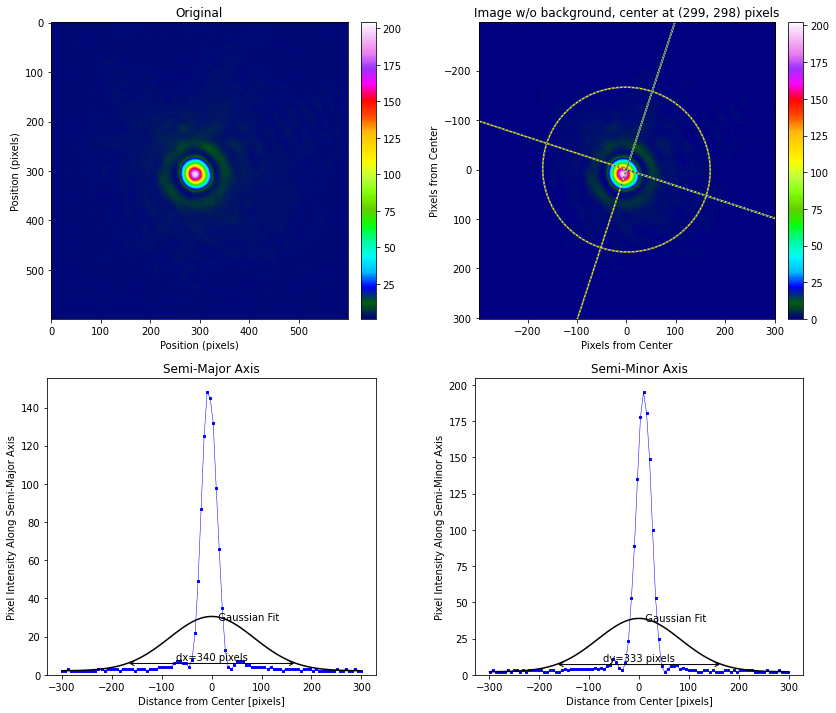

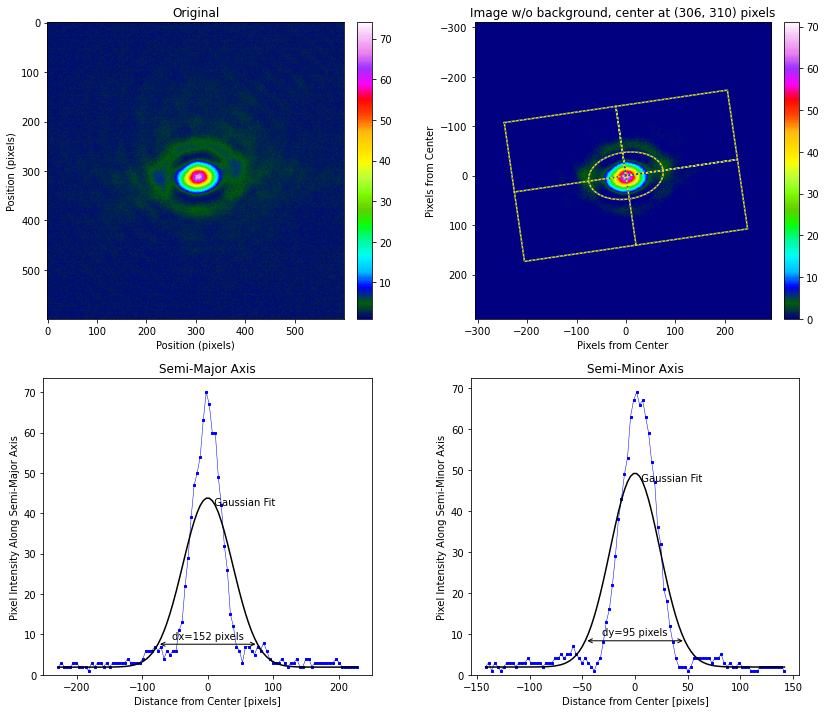

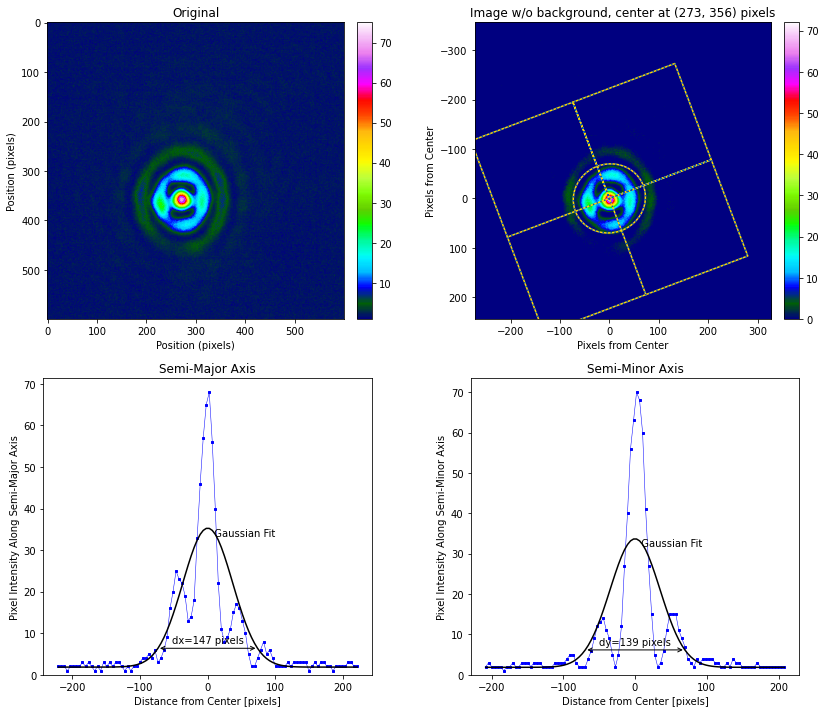

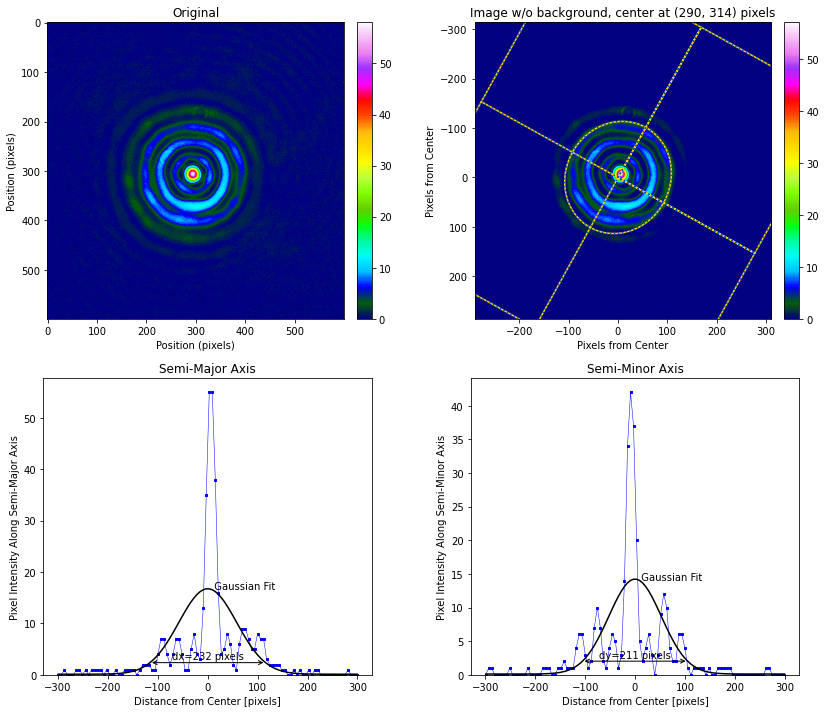

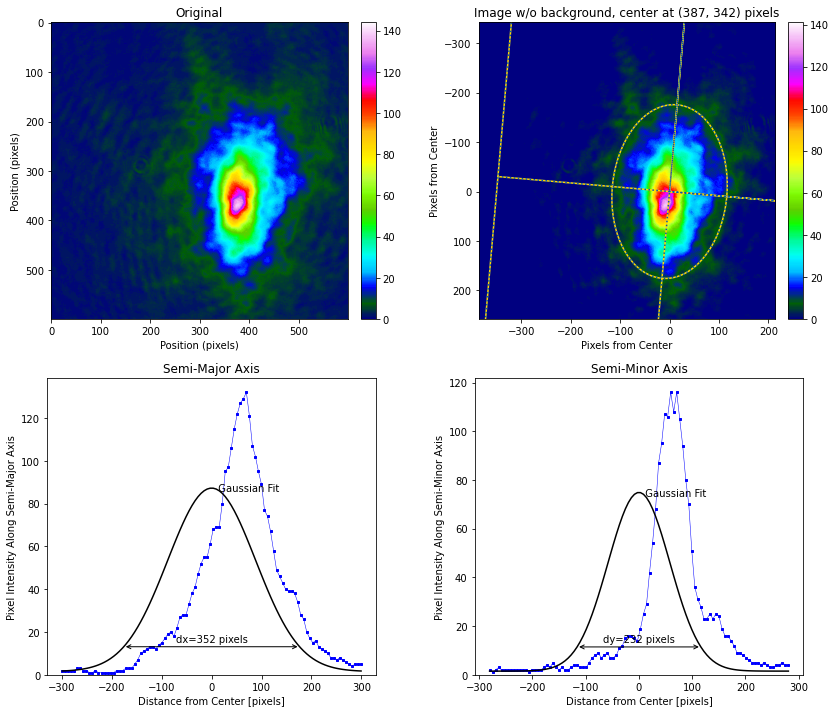

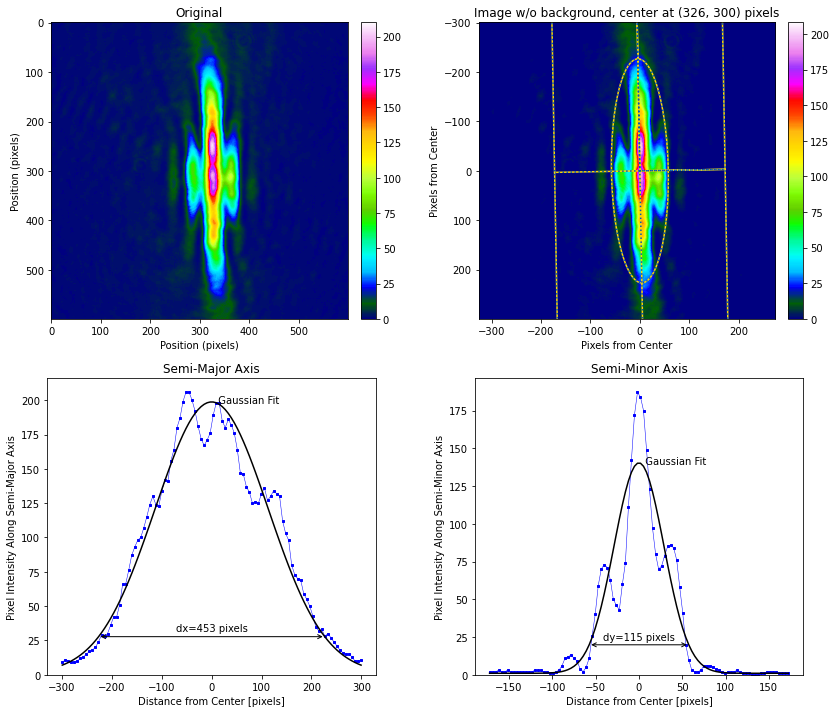

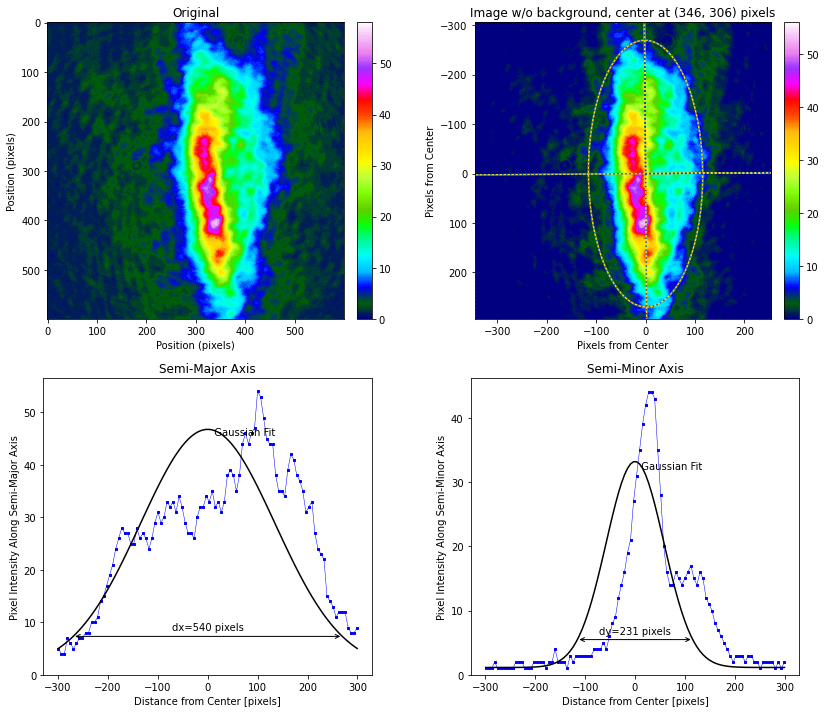

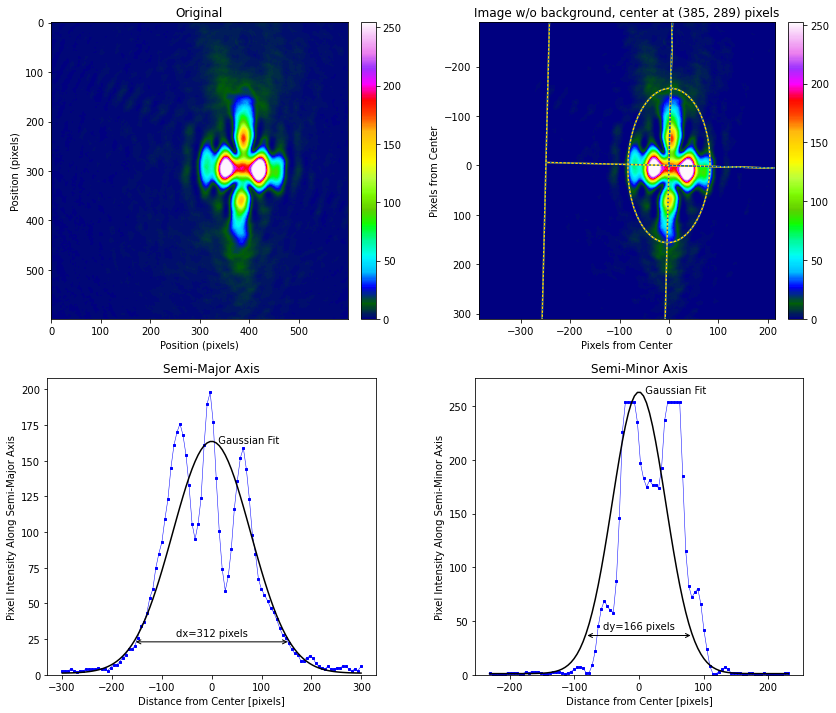

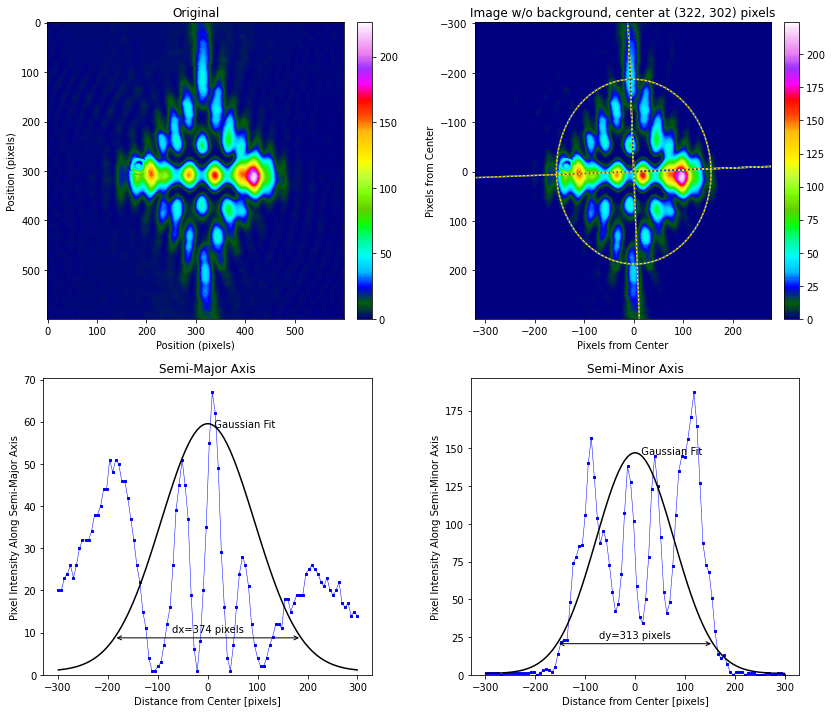

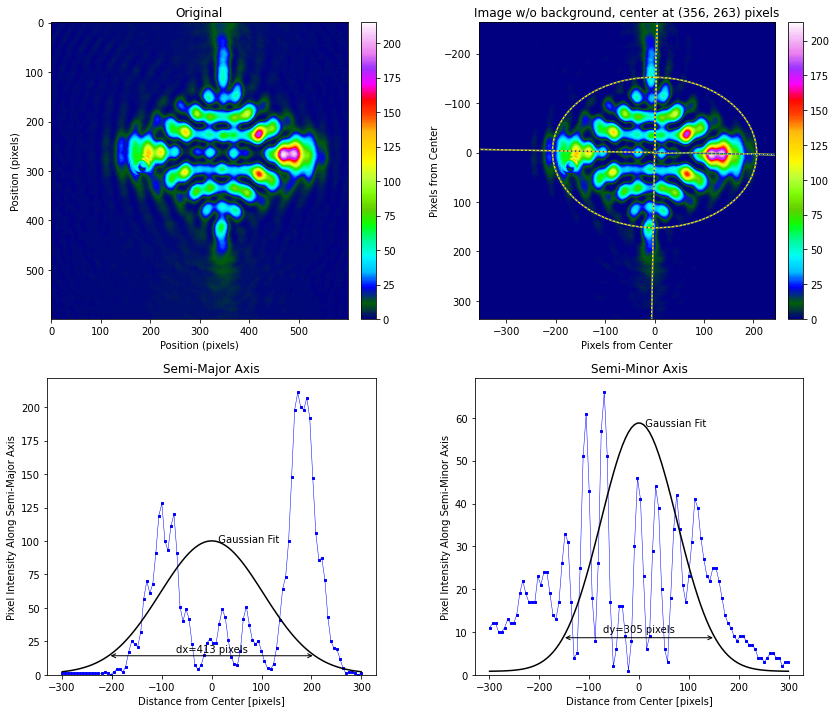

In [2]:
import cv2
#1
image_list0 = glob.glob(r'/home/zw3721/Downloads/2022_master_project/M2/*.png')
img=cv2.imread(image_list0[2])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
beam=gray
x, y, dx, dy, phi = lbs.beam_size(beam)
lbs.beam_size_plot(beam)
plt.show()
#2
image_list1 = glob.glob(r'/home/zw3721/Downloads/2022_master_project/M4/*.png')
img=cv2.imread(image_list1[30])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
beam=gray
x, y, dx, dy, phi = lbs.beam_size(beam)
lbs.beam_size_plot(beam)
plt.show()
#3
image_list2 = glob.glob(r'/home/zw3721/Downloads/2022_master_project/M5/*.png')
img=cv2.imread(image_list2[55])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
beam=gray
x, y, dx, dy, phi = lbs.beam_size(beam)
lbs.beam_size_plot(beam)
plt.show()
#4
image_list0 = glob.glob(r'/home/zw3721/Downloads/2022_master_project/bad images/*.png')
img=cv2.imread(image_list0[0])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
beam=gray
x, y, dx, dy, phi = lbs.beam_size(beam)
lbs.beam_size_plot(beam)
plt.show()
#5
image_list0 = glob.glob(r'/home/zw3721/Downloads/2022_master_project/bad images/*.png')

img=cv2.imread(image_list0[11])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
beam=gray
x, y, dx, dy, phi = lbs.beam_size(beam)
lbs.beam_size_plot(beam)
plt.show()


#6
image_list0 = glob.glob(r'/home/zw3721/Downloads/2022_master_project/bad images/*.png')

img=cv2.imread(image_list0[60])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
beam=gray
x, y, dx, dy, phi = lbs.beam_size(beam)
lbs.beam_size_plot(beam)
plt.show()
#7
image_list0 = glob.glob(r'/home/zw3721/Downloads/2022_master_project/bad images/*.png')

img=cv2.imread(image_list0[26])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
beam=gray
x, y, dx, dy, phi = lbs.beam_size(beam)
lbs.beam_size_plot(beam)
plt.show()
#8
image_list0 = glob.glob(r'/home/zw3721/Downloads/2022_master_project/bad images/*.png')

img=cv2.imread(image_list0[18])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
beam=gray
x, y, dx, dy, phi = lbs.beam_size(beam)
lbs.beam_size_plot(beam)
plt.show()
#9
image_list0 = glob.glob(r'/home/zw3721/Downloads/2022_master_project/bad images/*.png')

img=cv2.imread(image_list0[12])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
beam=gray
x, y, dx, dy, phi = lbs.beam_size(beam)
lbs.beam_size_plot(beam)
plt.show()
#10
image_list0 = glob.glob(r'/home/zw3721/Downloads/2022_master_project/bad images/*.png')

img=cv2.imread(image_list0[19])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
beam=gray
x, y, dx, dy, phi = lbs.beam_size(beam)
lbs.beam_size_plot(beam)
plt.show()

#have a look at the images we want to compare here

In [3]:
import PIL
import matplotlib.pyplot as plt 
import numpy as np
import glob
from scipy import stats
from PIL import Image
from scipy import optimize
import pandas as pd
import glob
from PIL import Image
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats
import math
from sklearn.metrics import r2_score
import pandas as pd
import csv

image_list = glob.glob(r'/home/zw3721/Downloads/2022_master_project/M3/*.png')
#this is a 100 identical images to test the stability of quality methods

def get_quality_number(image_list):
    Score = []
    for i in range (len(image_list)):               
        image = Image.open(image_list[i])
        image = image.convert('L')
        image_array = np.array(image)
        
        [x_max,y_max] = np.unravel_index(np.argmax(image_array), image_array.shape) 
        [m,n]=np.where(image_array==round(np.max(image_array)/math.exp(1)))
        length = np.sqrt(np.power(abs(m-x_max),2)+np.power(abs(n-y_max),2))
        Score.append(np.mean(length)/np.max(length))
#         Score = np.array(Score)
#     return Score.mean()
    return Score 
#this is 1/e method (Score)

Score_1=[]
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 4 / stddev)**2)

for i in range (len(image_list)):
    
    img=Image.open(image_list[i])
    img=img.convert('L')
    image_array = np.array(img)

    x=np.linspace(0,600,600)
    
         
    cx, cy, dx, dy, phi = lbs.beam_size(image_array)
    
    a=int(cx)
    b=int(cy)
    c=5 #box half-thickness
    y_x=0


    for j in range (a-c,a+c):
        y_x=y_x+image_array[j,:]/100 #tricky here since if this number is >255 it becomes 0.
    y_x=(y_x)/c*100

    y_y=0

    for j in range (b-c,b+c):
        y_y=y_y+image_array[:,j]/100
    y_y=((y_y)/c)*100


    popt_x, pcov_x = optimize.curve_fit(gaussian, x, y_x+1,maxfev=500000) # tricky here!!!!! y_x+1
    fitted_y_x=popt_x[0] * np.exp(-((x - popt_x[1]) / 4 / popt_x[2])**2)
    a_x=r2_score(y_x,fitted_y_x)
    popt_y, pcov_y = optimize.curve_fit(gaussian, x, y_y+1,maxfev=500000) # same here!!!! y_y+1
    fitted_y_y=popt_y[0] * np.exp(-((x - popt_y[1]) / 4 / popt_y[2])**2)
    a_y=r2_score(y_y,fitted_y_y)

    s1=abs(a_x*a_y)
    Score_1.append(s1)  

#this is the gaussian fit at centroid with box range +-5 (Score_1)


Score_2=[] #D4sigma
import imageio.v2 as imageio
import numpy as np
import matplotlib.pyplot as plt
import laserbeamsize as lbs
from skimage import color

import imageio.v3 as iio
from pathlib import Path

for i in range (len(image_list)):
    
    img=Image.open(image_list[i])
    img=img.convert('L')
    image_array = np.array(img)
    x, y, dx, dy, phi = lbs.beam_size(image_array)
    Ellipticity=min(dx,dy)/max(dx,dy)
    Eccentricity=np.sqrt(1-Ellipticity)
    Score_2.append(Ellipticity)
#this is the D4sigma method (Score_2)


def total_pixel_number(image_list):
    Score3 = []
    for i in range (len(image_list)):
        image = Image.open(image_list[i])
        image = image.convert('L')
        image_array = np.array(image)
        numerator = np.sum(image_array)
        denominator = np.sum(np.square(image_array))
        Score3.append(numerator/denominator)
    return Score3 
#this is the piexl value method without normalisation

def intensity_ratio(image_list):
    Score = []
    for i in range (len(image_list)):
        
        img=Image.open(image_list[i])
        img=img.convert('L')
        image_array = np.array(img)
        k=image_array.astype(int)
        k_sum=np.linalg.norm(k)
        x, y, dx, dy, phi = lbs.beam_size(image_array)
        res=0

        for i in range(0,600,1):
            for j in range(0,600,1):
                yc=abs(i-int(y))
                xc=abs(j-int(x))
                line=math.sqrt(xc*xc+yc*yc)
                m=line*k[i][j]
                res+=m
        f=(k_sum*k_sum)/res #distance to centre*intensity/total intensity
        centre=k[int(y)][int(x)]
        g=abs(k-centre)
        v=np.linalg.norm(g)/100000
        Score.append(v)
    return Score 
#this is the weighted intensity method

score4 = []
for i in range (len(image_list)):
    img = Image.open(image_list[i])
    img = img.convert('L')
    image_array = np.array(img)
    x, y, dx, dy, phi = lbs.beam_size(image_array)
    Ellipticity = min(dx,dy)/max(dx,dy) 
    threshold_up_area = (image_array >= np.max(image_array)/10)+0  #define a threshold area
    total_pixel = image_array.shape[0]*image_array.shape[1]   
    dispersion = total_pixel/np.sum(threshold_up_area) 
    quality_number = dispersion*Ellipticity 
    score4.append(quality_number)
#this is the distribution method
    
x=np.linspace(0,10,10)
y3=get_quality_number(image_list)
y1=Score_1
y4=Score_2
y2=total_pixel_number(image_list)
y6=score4
y5=intensity_ratio(image_list)
# print(y1)
# print(y2)
# print(y3)
# print(y4)
# print(y5)
# print(y6)
# plt.plot(x,y1,label="1/e")
# plt.plot(x,y2,label="gaussian")
# plt.plot(x,y3,label="D4sigma")
# plt.plot(x,y4,label="pixel")
# plt.legend()
# plt.show()
# plt.hist(y1,label="1/e")
# plt.hist(y2,label="gaussian")
# plt.hist(y3,label="D4sigma")
# plt.hist(y4,label="pixel")
# plt.legend()
# plt.show()

# y1.to_csv("1.csv", index=False)
    
# outfile = open('1.csv','w')
# out = csv.writer(outfile)
# out.writerows(map(lambda x: [x], y1)
# outfile.close()
    
# outfile = open('2.csv','w')
# out = csv.writer(outfile)
# out.writerows(map(lambda x: [x], y2)
# outfile.close()
              
# outfile = open('3.csv','w')
# out = csv.writer(outfile)
# out.writerows(map(lambda x: [x], y3)
# outfile.close()
              
              
# outfile = open('4.csv','w')
# out = csv.writer(outfile)
# out.writerows(map(lambda x: [x], y4)
# outfile.close()

# outfile = open('5.csv','w')
# out = csv.writer(outfile)
# out.writerows(map(lambda x: [x], y5)
# outfile.close()

# outfile = open('6.csv','w')
# out = csv.writer(outfile)
# out.writerows(map(lambda x: [x], y6)
# outfile.close()

In [4]:
y1=np.array(y1)

outfile = open('/home/zw3721/Downloads/2022_master_project/7.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], y1))
outfile.close()


y2=np.array(y2)

outfile = open('/home/zw3721/Downloads/2022_master_project/8.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], y2))
outfile.close()

y3=np.array(y3)

outfile = open('/home/zw3721/Downloads/2022_master_project/9.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], y3))
outfile.close()

y4=np.array(y4)

outfile = open('/home/zw3721/Downloads/2022_master_project/10.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], y4))
outfile.close()

y5=np.array(y5)

outfile = open('/home/zw3721/Downloads/2022_master_project/11.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], y5))
outfile.close()

y6=np.array(y6)

outfile = open('/home/zw3721/Downloads/2022_master_project/12.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], y6))
outfile.close()

#saving the scores to plot the results later.